In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-census-income/adult.csv


In [2]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/kaggle/input/adult-census-income/adult.csv")
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
na_features=['workclass','occupation','native.country']
for feature in na_features:
    df[feature]=df[feature].replace("?",np.nan)
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
for feature in na_features:
    df[feature]=df[feature].fillna(df[feature].mode()[0])

In [9]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
df=df.drop(columns=['fnlwgt'])

In [11]:
numeric_features=df.select_dtypes(include='number').columns
numeric_features

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

## **Data Visulization** ##

#### **Distribution of numeric features** ####

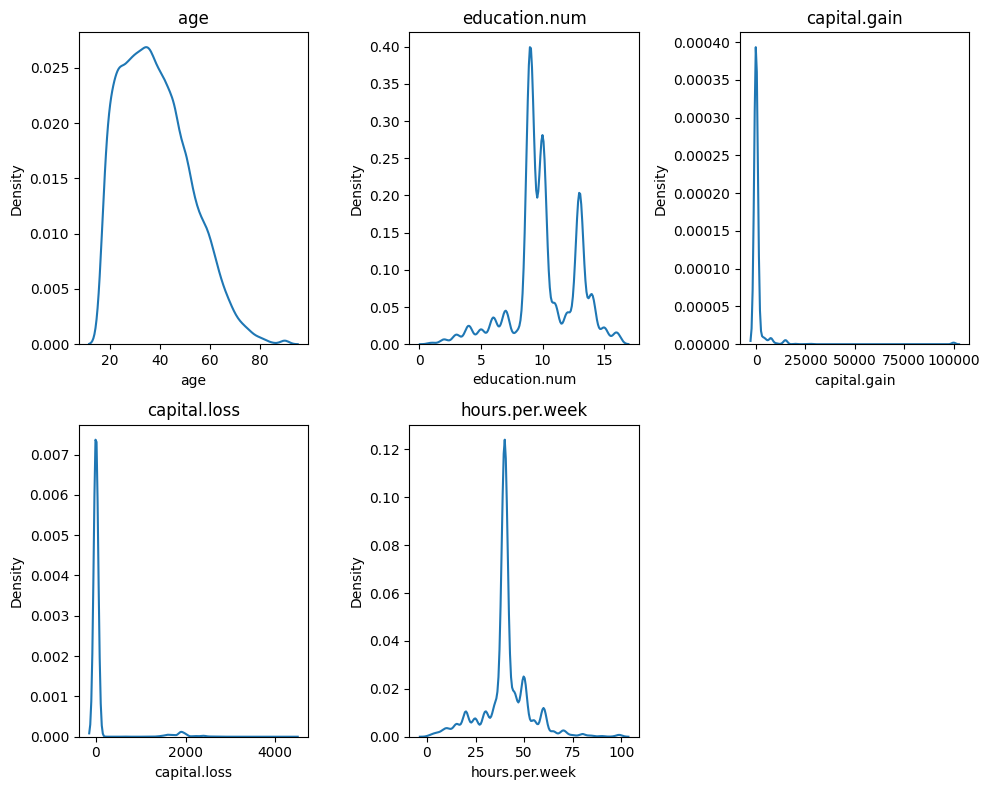

In [12]:

plt.figure(figsize=(10,8))
for i,feature in enumerate(numeric_features):
    plt.subplot(2,3,i+1)
    sns.kdeplot(data=df,x=feature)
    plt.title(feature)
plt.tight_layout()
plt.show()

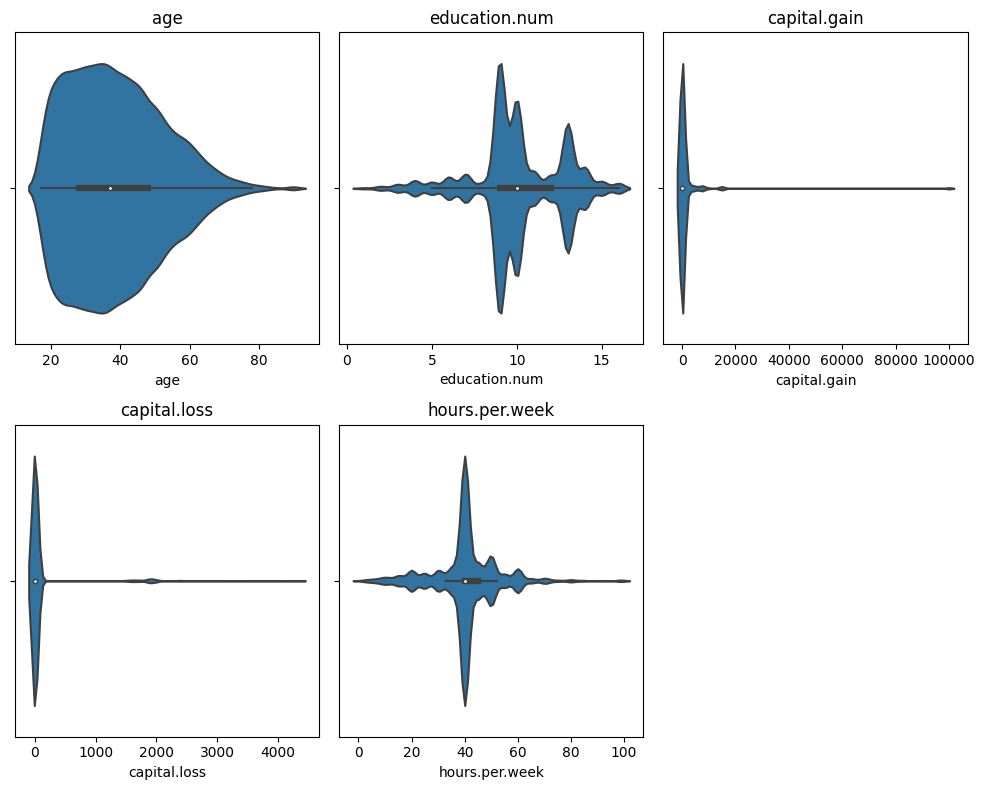

In [13]:

plt.figure(figsize=(10,8))
for i,feature in enumerate(numeric_features):
    plt.subplot(2,3,i+1)
    sns.violinplot(data=df,x=feature)
    plt.title(feature)
plt.tight_layout()
plt.show()

**Overview**:
* The distribution of  age is positively right-skewed, peaking around age group of 30 to 40.
* The education.num distribution is multi-modal, showing mutiple peaks.It is strongly concentrated around 8,10, and 13 .
* The weekly hours also followed multimodal distribution.Primary mode sharply spiked exactly at 40 hours,while Secondary modes clustered around 20-30 hours represeting part-time jobs.

In [14]:
cat_features=df.select_dtypes(include=['object']).columns
cat_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [15]:
for feature in cat_features:
    print(f"{feature}: {df[feature].unique()} \n")


workclass: ['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked'] 

education: ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool'] 

marital.status: ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation: ['Prof-specialty' 'Exec-managerial' 'Machine-op-inspct' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Armed-Forces'
 'Priv-house-serv'] 

relationship: ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife'] 

race: ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 

sex: ['Female' 'Male'] 

native.country: ['United-States' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad

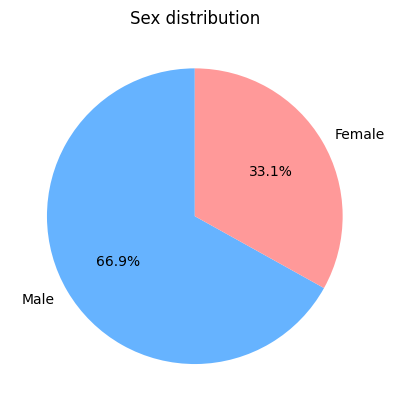

In [16]:
colors = ['#66b3ff', '#ff9999'] ## sky blue and pink
sex_counts=df['sex'].value_counts()
plt.pie(x=sex_counts,labels=sex_counts.index,autopct="%1.1f%%",
        startangle=90,colors=colors)
plt.title("Sex distribution")
plt.show()


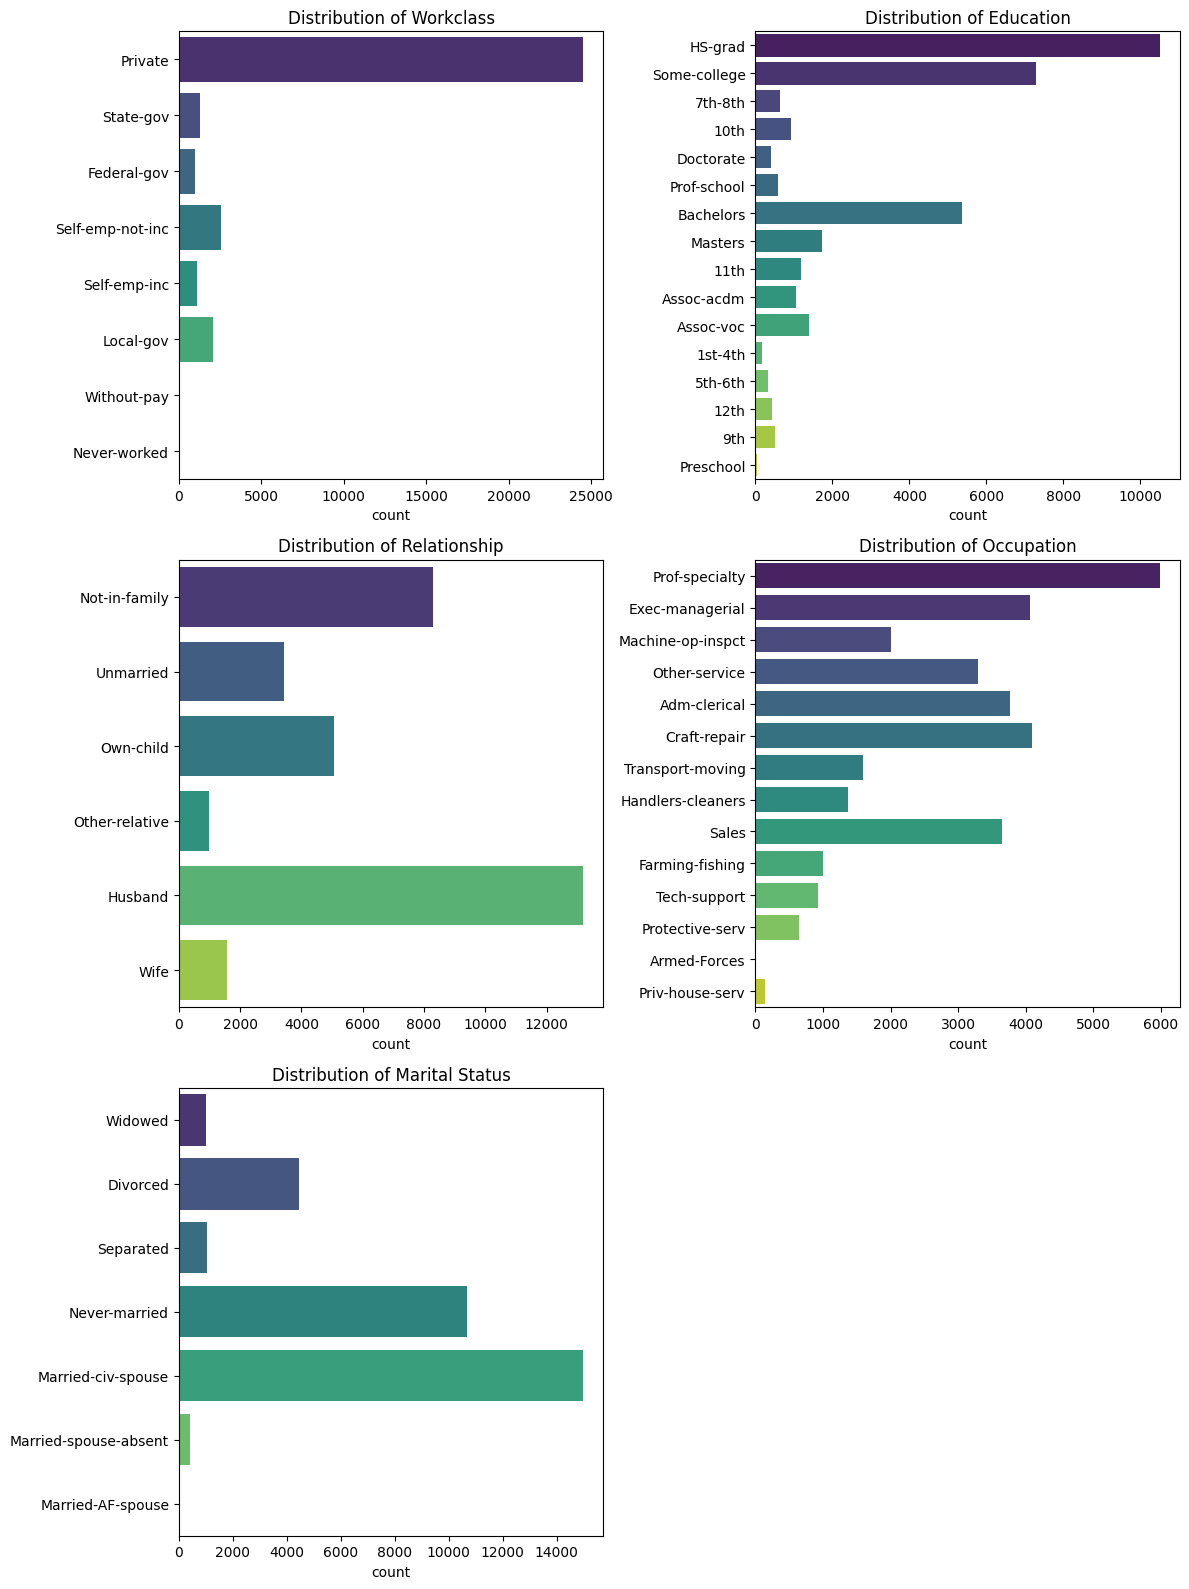

In [17]:


selected_features = ['workclass', 'education', 'relationship', 'occupation', 'marital.status']


plt.figure(figsize=(12, 16)) 

for i, feature in enumerate(selected_features):
   
    plt.subplot(3, 2, i + 1)
    

    sns.countplot(y=feature, data=df, palette='viridis') 
    

    plt.title(f'Distribution of {feature.replace(".", " ").title()}', fontsize=12)

    plt.ylabel('') 

plt.tight_layout()
plt.show()

<Axes: >

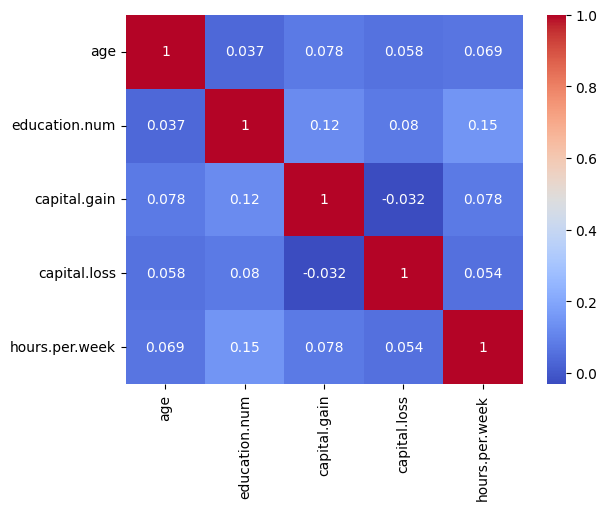

In [18]:
numeric_corrs=df[numeric_features].corr()
sns.heatmap(numeric_corrs,annot=True,cmap='coolwarm')

None of the features shows strong correlation.Thus,The features are heavily independent of each other.

# **Handling outliers** # 

In [19]:
df.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [20]:
df['capital.gain_log']=np.log1p(df['capital.gain'])
df['capital.loss_log']=np.log1p(df['capital.loss'])

In [21]:
df.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week,capital.gain_log,capital.loss_log
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.734621,0.350305
std,13.640433,2.572720,7385.292085,402.960219,12.347429,2.454738,1.584581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,11.512925,8.379539


 #### **The hidden distributions previously squashed by heavy outliers in captal gain/loss** 

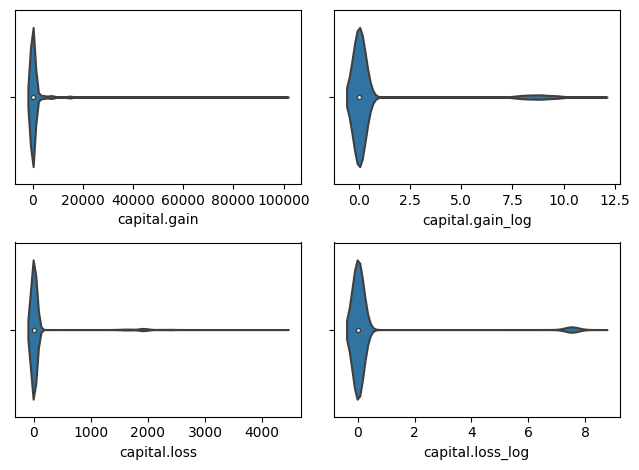

In [22]:
outlier_features=['capital.gain','capital.gain_log',
                   'capital.loss','capital.loss_log']

for i,feature in enumerate(outlier_features):
    plt.subplot(2,2,i+1)
    sns.violinplot(x=df[feature])
plt.tight_layout()
plt.show()

In [23]:
df['sex']=df['sex'].map({"Male":0,"Female":1})
df['income']=df['income'].map({"<=50K":0,">50K":1})
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,capital.gain_log,capital.loss_log
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,1,0,4356,40,United-States,0,0.0,8.379539
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,0,0.0,8.379539
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,1,0,4356,40,United-States,0,0.0,8.379539
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,0,0.0,8.268988
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,0,0.0,8.268988


In [24]:
education_order = {
    'Preschool': 0,
    '1st-4th': 1,
    '5th-6th': 2,
    '7th-8th': 3,
    '9th': 4,
    '10th': 5,
    '11th': 6,
    '12th': 7,
    'HS-grad': 8,
    'Some-college': 9,
    'Assoc-acdm': 10,
    'Assoc-voc': 11,
    'Bachelors': 12,
    'Masters': 13,
    'Prof-school': 14,
    'Doctorate': 15
}
df['education']=df['education'].map(education_order)

In [25]:
multi_class_features=['workclass','marital.status','occupation','relationship','race','native.country']
df=pd.get_dummies(df,columns=multi_class_features,drop_first=True,dtype=int)
df=df.drop(columns=['capital.gain','capital.loss'])
df.head()

,age,education,education.num,sex,hours.per.week,income,capital.gain_log,capital.loss_log,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,8,9,1,40,0,0.0,8.379539,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,8,9,1,18,0,0.0,8.379539,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,9,10,1,40,0,0.0,8.379539,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,3,4,1,40,0,0.0,8.268988,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,9,10,1,40,0,0.0,8.268988,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
from sklearn.preprocessing import StandardScaler
numeric_features=['age','education.num','hours.per.week','capital.gain_log','capital.loss_log']
print(numeric_features)
scaler=StandardScaler()
df[numeric_features]=scaler.fit_transform(df[numeric_features])


['age', 'education.num', 'hours.per.week', 'capital.gain_log', 'capital.loss_log']


In [27]:
df.tail()

,age,education,education.num,sex,hours.per.week,income,capital.gain_log,capital.loss_log,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
32556,-1.215643,9,-0.031360,0,-0.035429,0,-0.299271,-0.221075,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,-0.849080,10,0.746039,1,-0.197409,0,-0.299271,-0.221075,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0.103983,8,-0.420060,0,-0.035429,1,-0.299271,-0.221075,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,1.423610,8,-0.420060,1,-0.035429,0,-0.299271,-0.221075,0,0,...,0,0,0,0,0,0,0,1,0,0
32560,-1.215643,8,-0.420060,0,-1.655225,0,-0.299271,-0.221075,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
from sklearn.model_selection import train_test_split,cross_val_score 
X=df.drop(columns=['income'])
y=df['income']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [29]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,classification_report

model=LogisticRegression(max_iter=1000)

In [30]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
scores=cross_val_score(model,X,y,cv=5,scoring='accuracy')
print("Accuracy score: ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Average cross val score: ",scores.mean())


Accuracy score:  0.841087056655919
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4976
           1       0.70      0.57      0.63      1537

    accuracy                           0.84      6513
   macro avg       0.79      0.75      0.76      6513
weighted avg       0.83      0.84      0.84      6513

Average cross val score:  0.8196633712352275


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from xgboost import XGBClassifier

def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', max_iter=3000, class_weight='balanced'),
            'parameters': {
                'C': [0.1, 1, 5, 10]
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5, 10, None]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(),
            'parameters': {
                'n_estimators': [50, 100, 200],
                'max_depth': [5, 10, None],
                'criterion': ['gini', 'entropy']
            }
        },
        
        'xgboost': {
            'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
            'parameters': {
                'n_estimators': [50, 100, 200],
                'max_depth': [3, 5, 7],
                'learning_rate': [0.01, 0.1, 0.2],
                'subsample': [0.7, 1]
            }
        }
    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'],
                          cv=cv_shuffle, return_train_score=False, n_jobs=-1)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
    
    return pd.DataFrame(scores).sort_values(by='score', ascending=False)


In [32]:
df=find_best_model(X_train,y_train)
df=df.sort_values(by='score',ascending=False)
df

,model,best_parameters,score
3,xgboost,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.869597
2,random_forest,"{'criterion': 'gini', 'max_depth': 10, 'n_esti...",0.856008
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 10}",0.853666
0,logistic_regression,{'C': 5},0.799501


In [34]:
best_model=XGBClassifier(
    learning_rate=0.2,
    max_depth=7,
    n_estimators=200,
    subsample=1,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)


Accuracy_score  0.8705665591893137
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4976
           1       0.77      0.65      0.70      1537

    accuracy                           0.87      6513
   macro avg       0.83      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



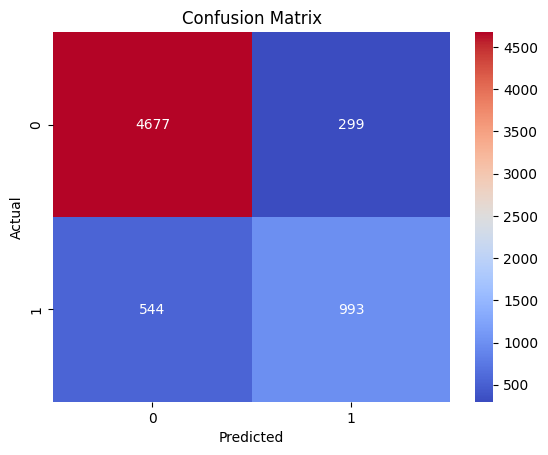

In [40]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy_score ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='coolwarm', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()